In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Bert , distill Bert, distilBert tokenizer

In [5]:
df = pd.read_csv('datos_productos.csv')

# Análisis Univariado (Distribuciones Individuales)

In [15]:
sns.set_palette(sns.color_palette("coolwarm"))  # 4 colores

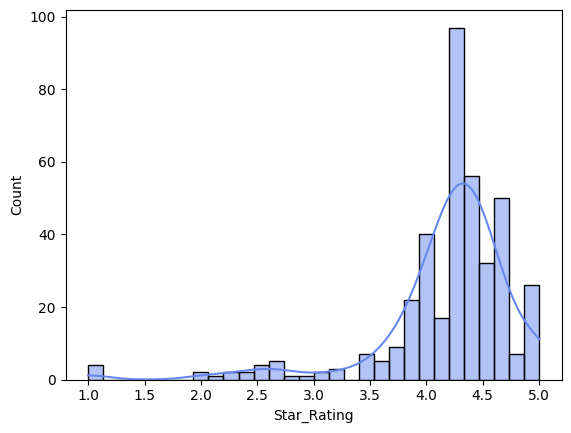

In [17]:
sns.histplot(df['Star_Rating'], kde=True)
plt.show()

In [19]:
#Viendo el histograma, tenemos un problema de sesgo , para el cual vamos a separar en categorias 

#### El histograma nos muestra que la mayoría de calificaciones están entre 4 y 5 estrellas , con lo cuál va a haber ciertos sesgo hacia lo positivo

In [22]:
#Histograma en escala logarítmica (por la posible disparidad entre 1 review y 1000+)

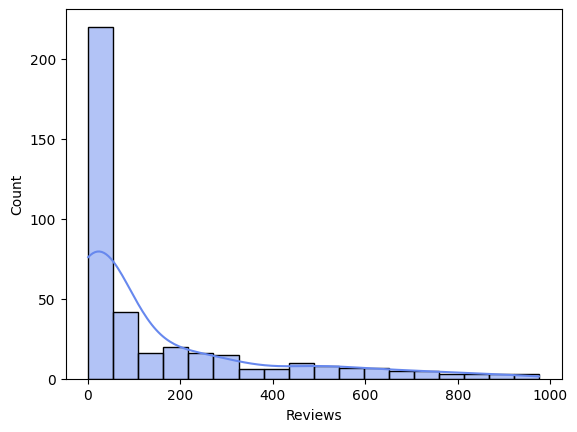

In [24]:
sns.histplot((df['Reviews']), kde=True)  # +1 para evitar log(0) # +1 para evitar log(0)
plt.show()

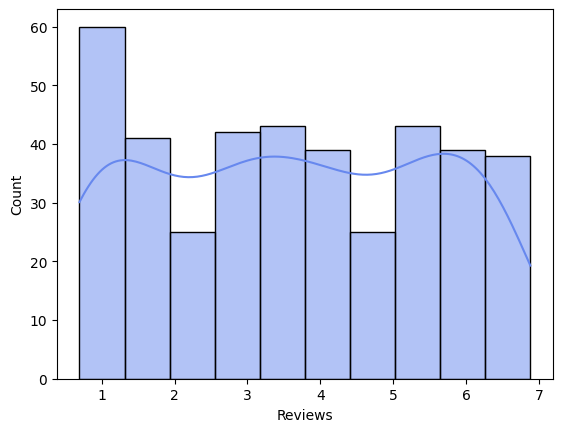

In [33]:
sns.histplot(x=np.log(df['Reviews'] + 1), kde=True)
plt.show()

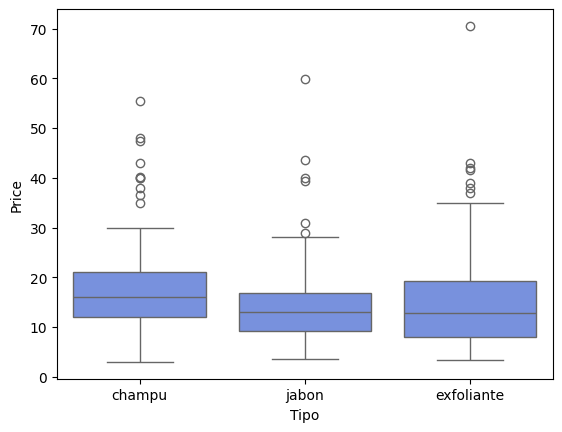

In [45]:
sns.boxplot(x='Tipo', y='Price', data=df)
plt.show()

In [47]:
#Count plot para ver la proporción de champús, jabones y exfoliantes.

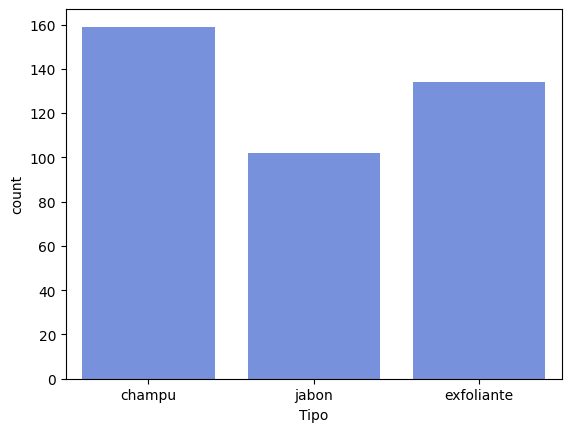

In [49]:
sns.countplot(x='Tipo', data=df)
plt.show()

# Análisis Bivariado (Relaciones entre variables)

In [53]:
#¿Los productos con más reviews tienden a tener calificaciones más estables (ej: menos volatilidad en 1-2 estrellas)?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


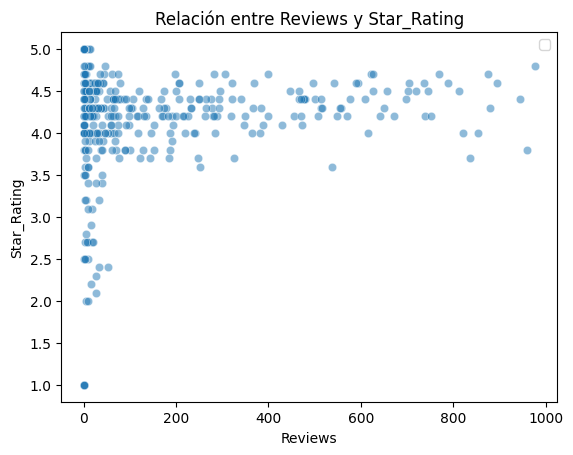

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el scatter plot
sns.scatterplot(x='Reviews', y='Star_Rating', data=df, alpha=0.5)

# # Línea vertical en x = 60
# plt.axvline(x=60, color='red', linestyle='--', linewidth=2, label='Umbral Reviews (x = 60)')

# # Línea horizontal en y = 3.5
# plt.axhline(y=3.5, color='blue', linestyle='--', linewidth=2, label='Umbral Star_Rating (y = 3.5)')

# Añadir leyenda
plt.legend()

# Etiquetas de los ejes
plt.xlabel('Reviews')
plt.ylabel('Star_Rating')

# Título del gráfico
plt.title('Relación entre Reviews y Star_Rating')

# Mostrar el gráfico
plt.show()

In [ ]:
# IMPORTANTE - INSIGHTS estrategia de marketing, intentar llegar a x reviews para asegurar asentamiento de producto

In [130]:


# Filtrar datos con Star_Rating < 3.5
df_bajo = df[df['Star_Rating'] < 3.5]

# Filtrar datos con Star_Rating >= 3.5
df_alto = df[df['Star_Rating'] >= 3.5]

# Encontrar el valor máximo de Reviews en el grupo con Star_Rating < 3.5
umbral_reviews = df_bajo['Reviews'].max()

print(f"Umbral de Reviews: {umbral_reviews}")

# Verificar que no haya datos con Star_Rating < 3.5 por encima de este umbral
datos_fuera_del_umbral = df[(df['Reviews'] > umbral_reviews) & (df['Star_Rating'] < 3.5)]

if datos_fuera_del_umbral.empty:
    print("No hay datos con Star_Rating < 3.5 por encima del umbral.")
else:
    print("Hay datos con Star_Rating < 3.5 por encima del umbral:")
    print(datos_fuera_del_umbral)

Umbral de Reviews: 52
No hay datos con Star_Rating < 3.5 por encima del umbral.


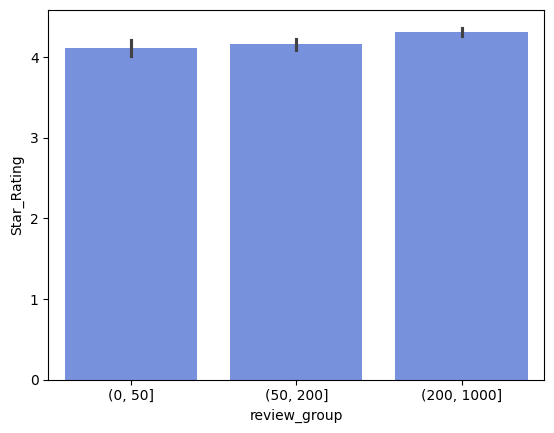

In [57]:
df['review_group'] = pd.cut(df['Reviews'], bins=[0, 50, 200, 1000])
sns.barplot(x='review_group', y='Star_Rating', data=df)
plt.show()

In [59]:
#¿Los champús tienen calificaciones más altas que los exfoliantes?

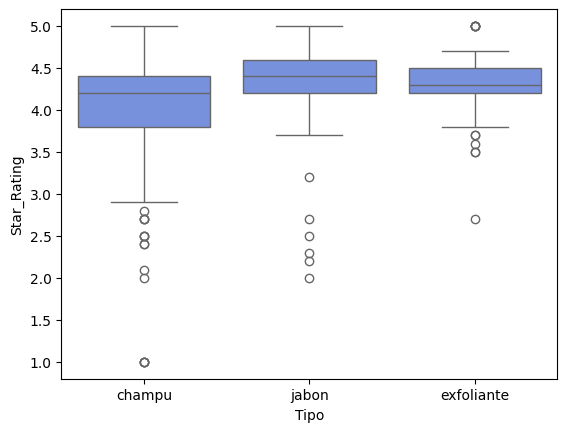

In [61]:
sns.boxplot(x='Tipo', y='Star_Rating', data=df)
plt.show()

In [63]:
#¿Los productos más caros tienen mejores calificaciones?

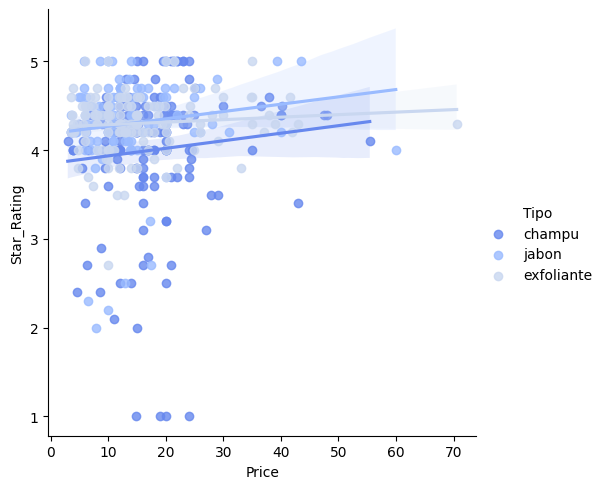

In [65]:
sns.lmplot(x='Price', y='Star_Rating', data=df, hue='Tipo')
plt.show()

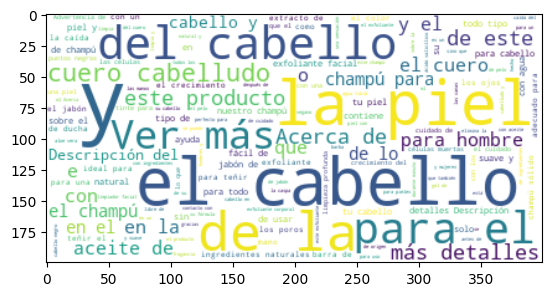

In [72]:
from wordcloud import WordCloud
text = ' '.join(df['Product_Description'])
wc = WordCloud(background_color='white').generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.show()

# Análisis Multivariado

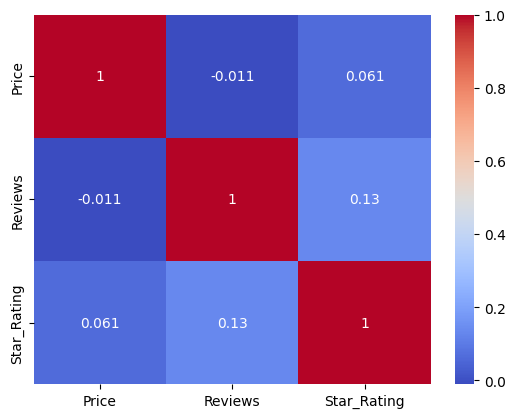

In [78]:
corr = df[['Price', 'Reviews', 'Star_Rating']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

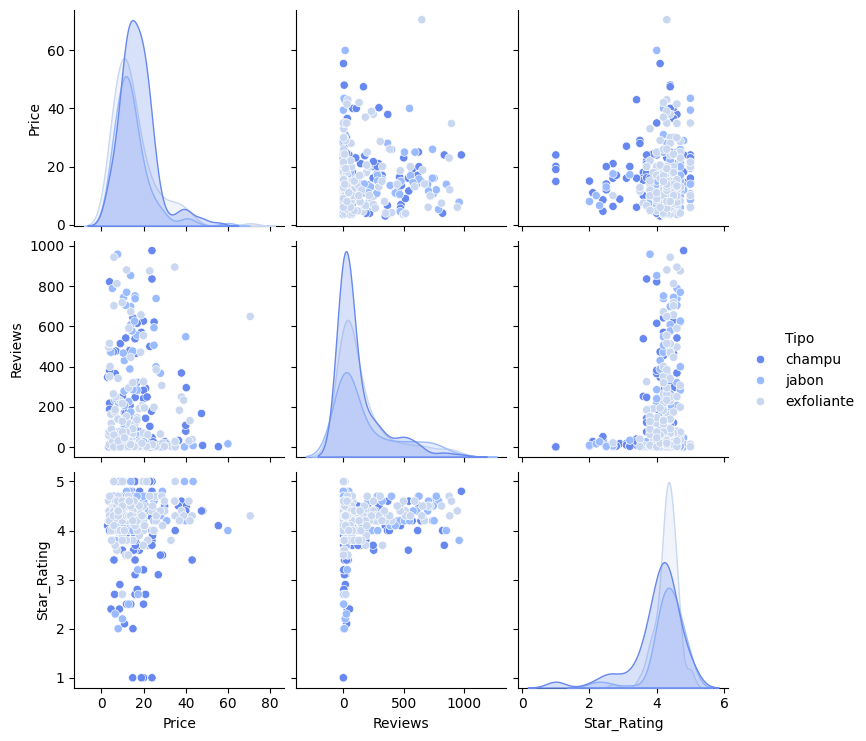

In [80]:
sns.pairplot(df[['Price', 'Reviews', 'Star_Rating', 'Tipo']], hue='Tipo')
plt.show()

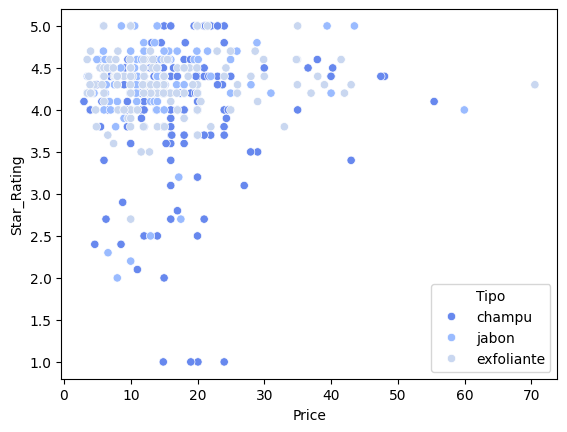

In [81]:
sns.scatterplot(x='Price', y='Star_Rating', hue='Tipo', data=df)
plt.show()

In [83]:
# global_mean = df['Star_Rating'].mean()
# C = 50  # Umbral de confianza (ajustable)
# df['weighted_rating'] = (
#     (df['Reviews'] / (df['Reviews'] + C)) * df['Star_Rating'] +
#     (C / (df['Reviews'] + C)) * global_mean
# )

In [117]:
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Reviews', y='weighted_rating', data=df, alpha=0.5)
# plt.title('Relación entre Reviews y Calificación Ponderada')
# plt.xlabel('Número de Reviews')
# plt.ylabel('Calificación Ponderada')
# plt.show()

In [121]:
# df['log_reviews'] = np.log1p(df['Reviews'] + 1)  # Evita log(0)
# sns.scatterplot(x='log_reviews', y='weighted_rating', data=df)
# plt.show()

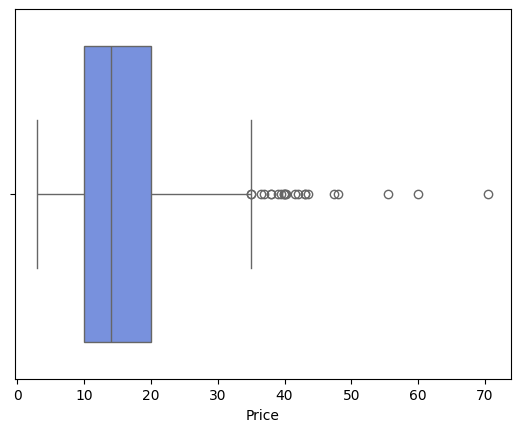

In [26]:
sns.boxplot(x=df['Price'])
plt.show()

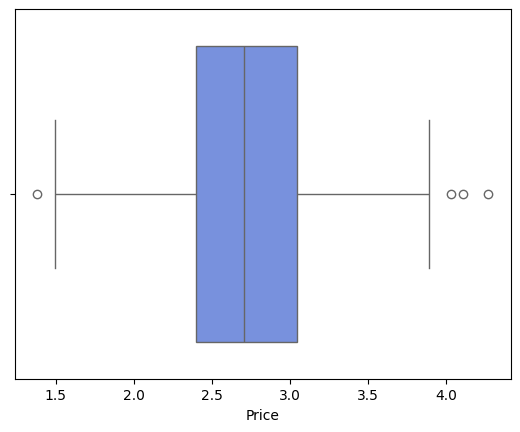

In [28]:
# Opción 1: Aplicar log(Price + 1) para evitar problemas con ceros
sns.boxplot(x=np.log(df['Price'] + 1))  # +1 evita log(0) = -inf

plt.show()

In [92]:
# Calcular IQR (Rango Intercuartil)
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
outliers_price = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
print(f"Outliers en Price: {len(outliers_price)}")

Outliers en Price: 22


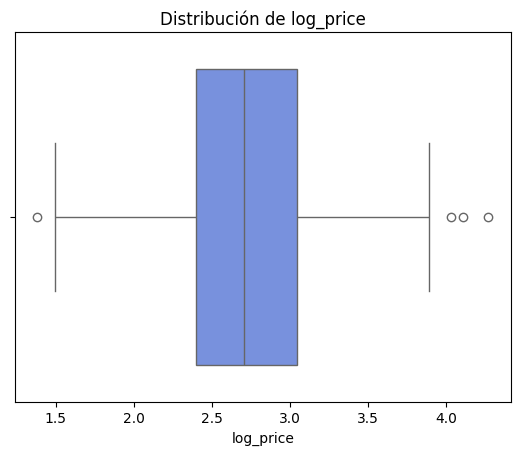

In [94]:
# Evitar log(0) sumando 1
df['log_price'] = np.log(df['Price'] + 1)

# Visualizar distribución transformada
sns.boxplot(x=df['log_price'])
plt.title('Distribución de log_price')
plt.show()

In [97]:
# df[df["weighted_rating"]<3.3]   #comprobamos outlier y result que es legítimo

,Price,Star_Rating,Reviews,Product_Description,Tipo,review_group,hidratante,weighted_rating,log_reviews,log_price
46,4.61,2.4,52,"Jabón para Cabello,Jabón para Oscurecer Cabell...",champu,"(50, 200]",0,3.272797,3.988984,1.724551


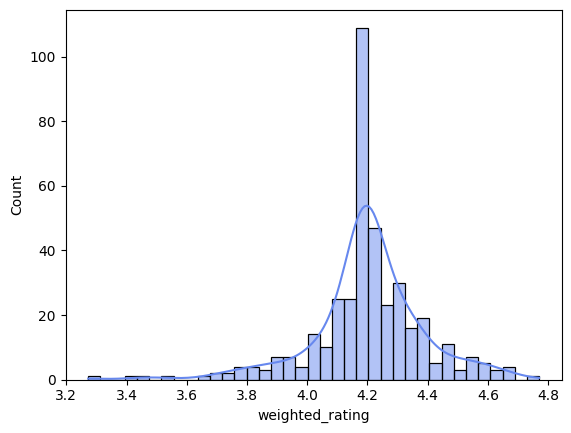

In [99]:
# sns.histplot(df['weighted_rating'], kde=True)
# plt.show()

In [101]:
# Crear 3 categorías
bins = [0, 3.9, 4.2,4.4,4.6 ,5.0]
labels = ['Baja','BajaMedia', 'Media','mediaalta', 'Alta']
df['rating_category'] = pd.cut(df['Star_Rating'], bins=bins, labels=labels)


In [114]:
# # Crear 3 categorías equilibradas
# bins = [0, 4, 4.4, 5.0]
# labels = ['Baja', 'Media', 'Alta']
# df['rating_category'] = pd.cut(df['Star_Rating'], bins=bins, labels=labels)

# # Ver distribución
# sns.countplot(x='rating_category', data=df)
# plt.title('Distribución de Categorías')
# plt.show()